In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import pickle

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r"C:\Users\mahes\Downloads\av1.zip")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.shape

(18249, 14)

In [5]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.shape

(18249, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [9]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [10]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [11]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

As we can see that some of columns are highly skewed let us proceed with it later we will treat as per requirement

In [12]:
df['Year'],df['month'],df['day']=df['Date'].str.split('-').str

We have split column 'Date' into three new column namely Year,month,day .

In [13]:
df['Year']=df['Year'].astype(int)
df['month']=df['month'].astype(int)
df['day']=df['day'].astype(int)

In [14]:
df.drop(['year','Date'],axis=1,inplace=True)
df.shape

(18249, 14)

# Visualization

conventional    9126
organic         9123
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

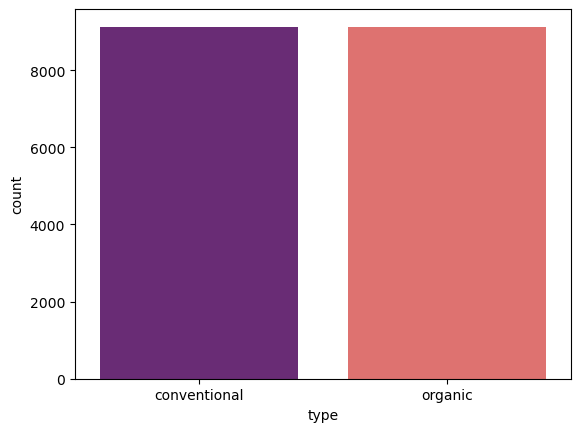

In [15]:
print(df['type'].value_counts())
sns.countplot(x='type',data=df,palette='magma')

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64


<AxesSubplot:xlabel='Year', ylabel='count'>

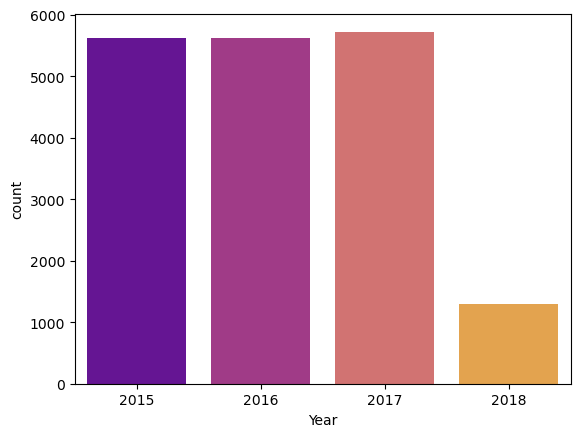

In [16]:
print(df['Year'].value_counts())
sns.countplot(x='Year',data=df,palette='plasma')

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: month, dtype: int64


<AxesSubplot:xlabel='month', ylabel='count'>

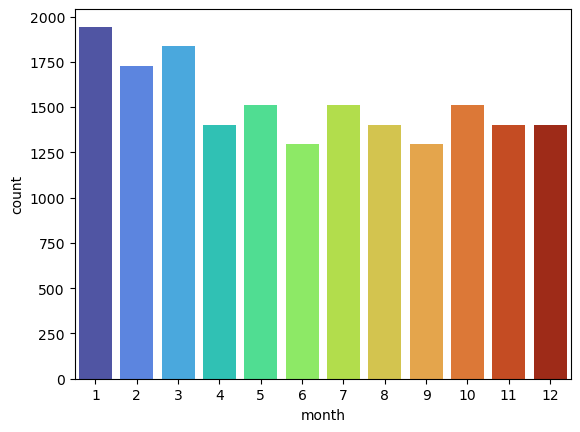

In [17]:
print(df['month'].value_counts())
sns.countplot(x='month',data=df,palette='turbo')

4     756
11    756
18    755
25    755
1     648
26    648
5     648
12    648
3     648
8     648
15    648
22    648
24    648
17    648
10    648
19    648
7     540
14    540
21    540
28    540
27    540
20    540
29    540
13    540
6     539
2     432
9     432
23    432
30    432
31    432
16    432
Name: day, dtype: int64


<AxesSubplot:xlabel='day', ylabel='count'>

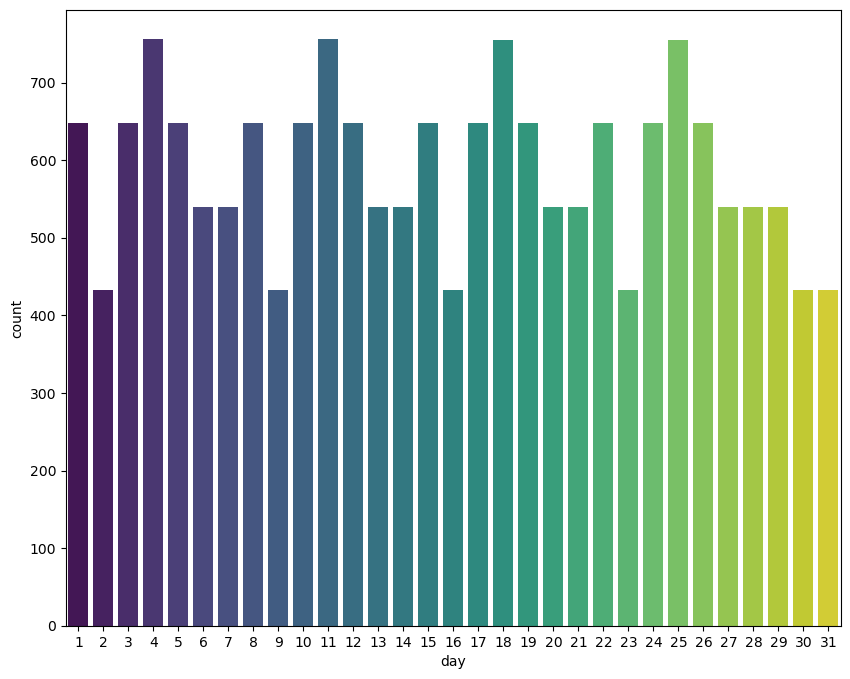

In [18]:
print(df['day'].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(x='day',data=df,palette='viridis')

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

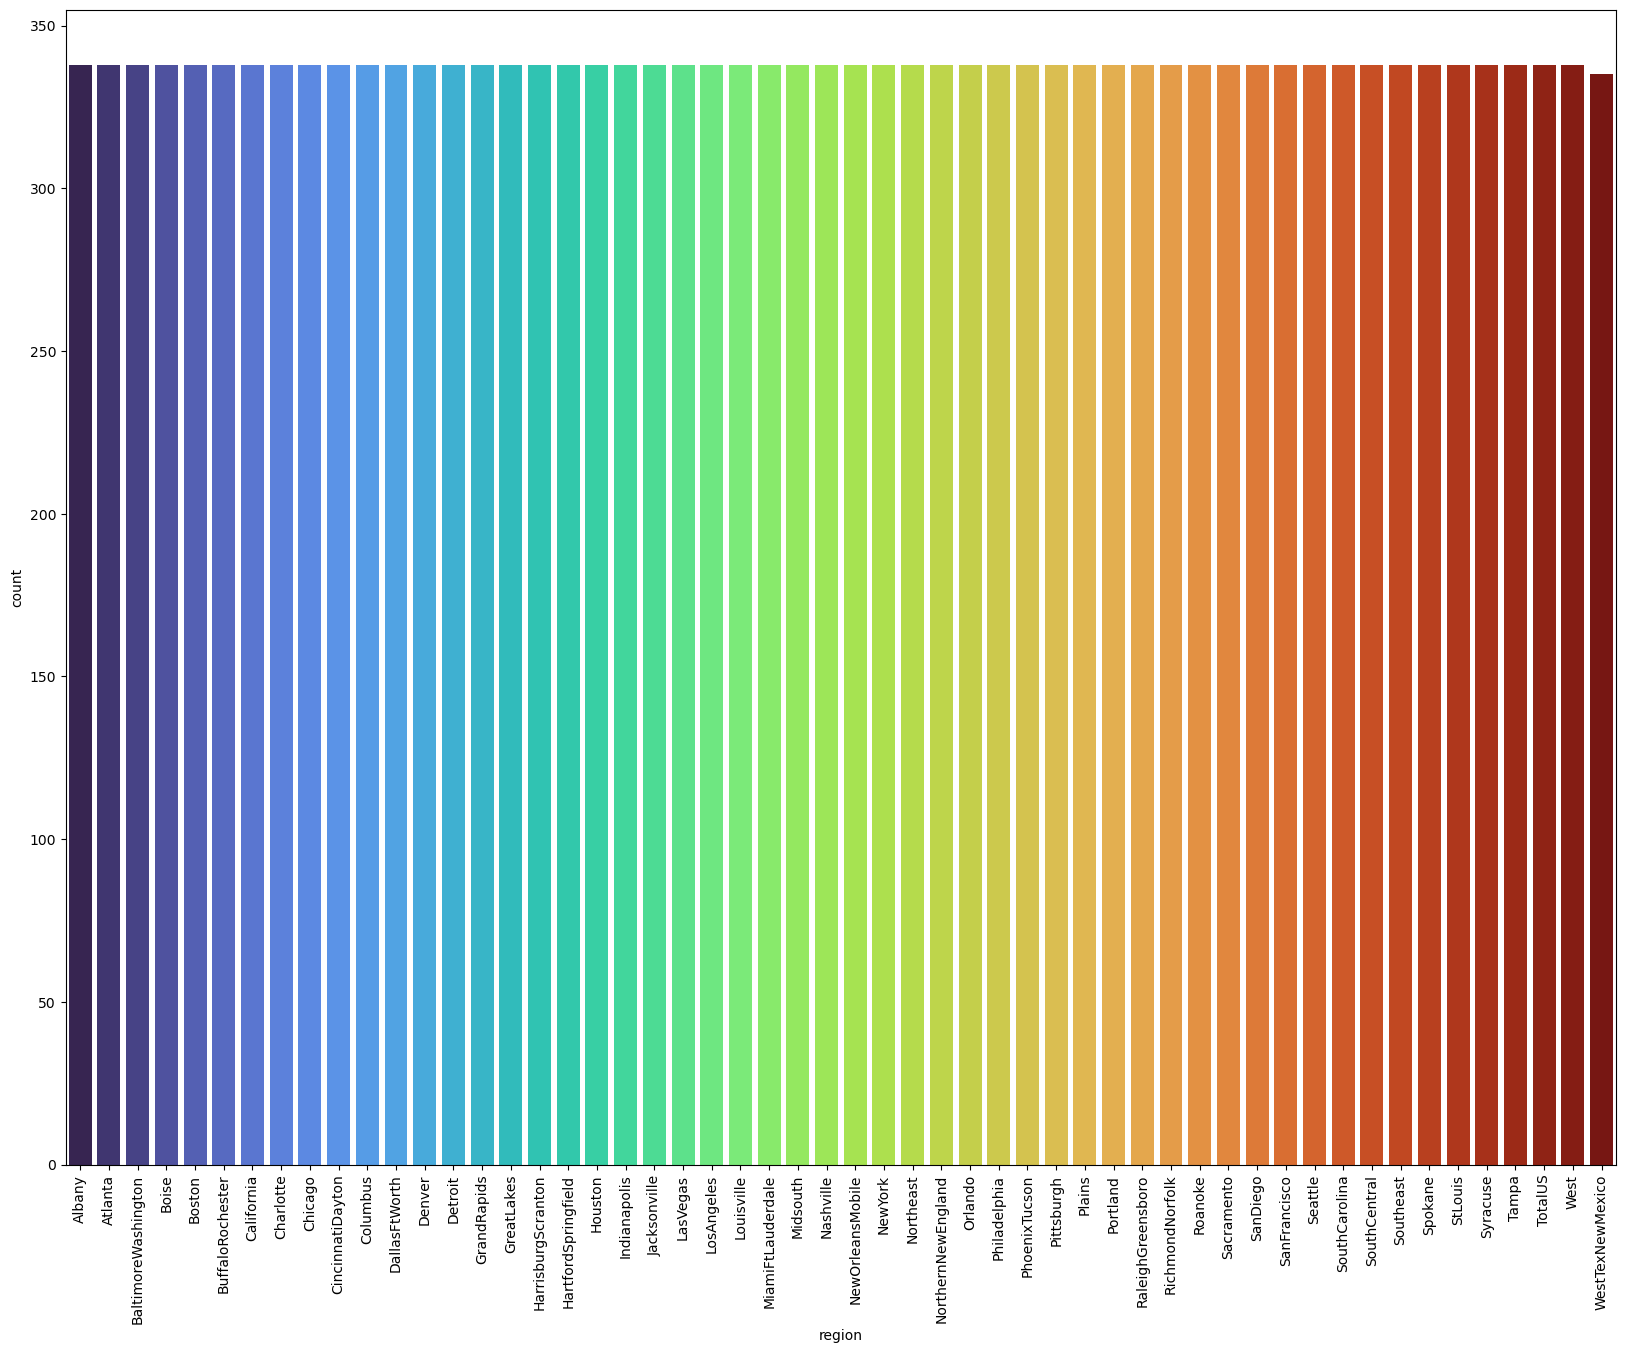

In [19]:
print(df['region'].value_counts())
plt.figure(figsize=(20,15))
sns.countplot(x='region',data=df,palette='turbo')
plt.xticks(rotation=90)
plt.show()

<Figure size 1500x1000 with 0 Axes>

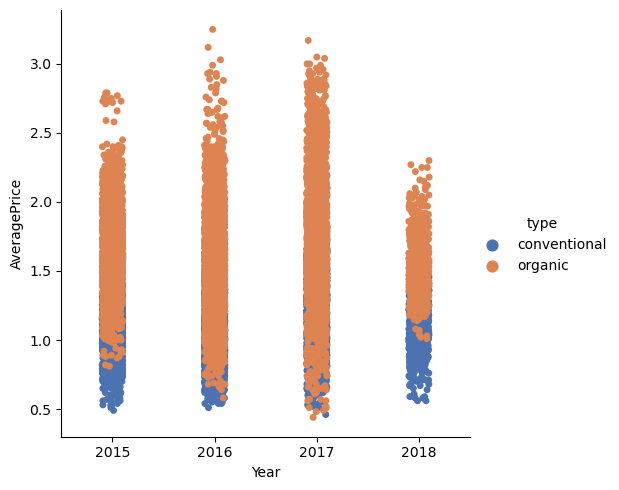

In [20]:
plt.figure(figsize=(15,10))
sns.catplot(x="Year", y="AveragePrice", hue="type", data=df, palette="deep")
plt.show()

<Figure size 1500x1000 with 0 Axes>

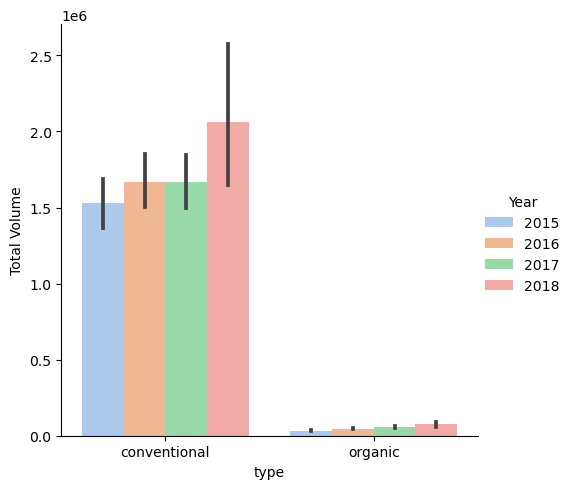

In [21]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Volume", hue="Year", kind="bar", data=df, palette="pastel")
plt.show()

<Figure size 1500x1000 with 0 Axes>

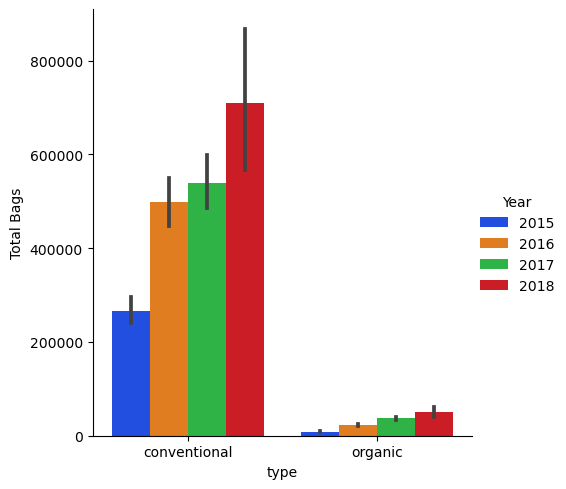

In [22]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Bags", hue="Year", data=df, kind="bar", palette="bright")
plt.show()

This indicates that the total number of conventional type bags has consistently exceeded that of the organic type.

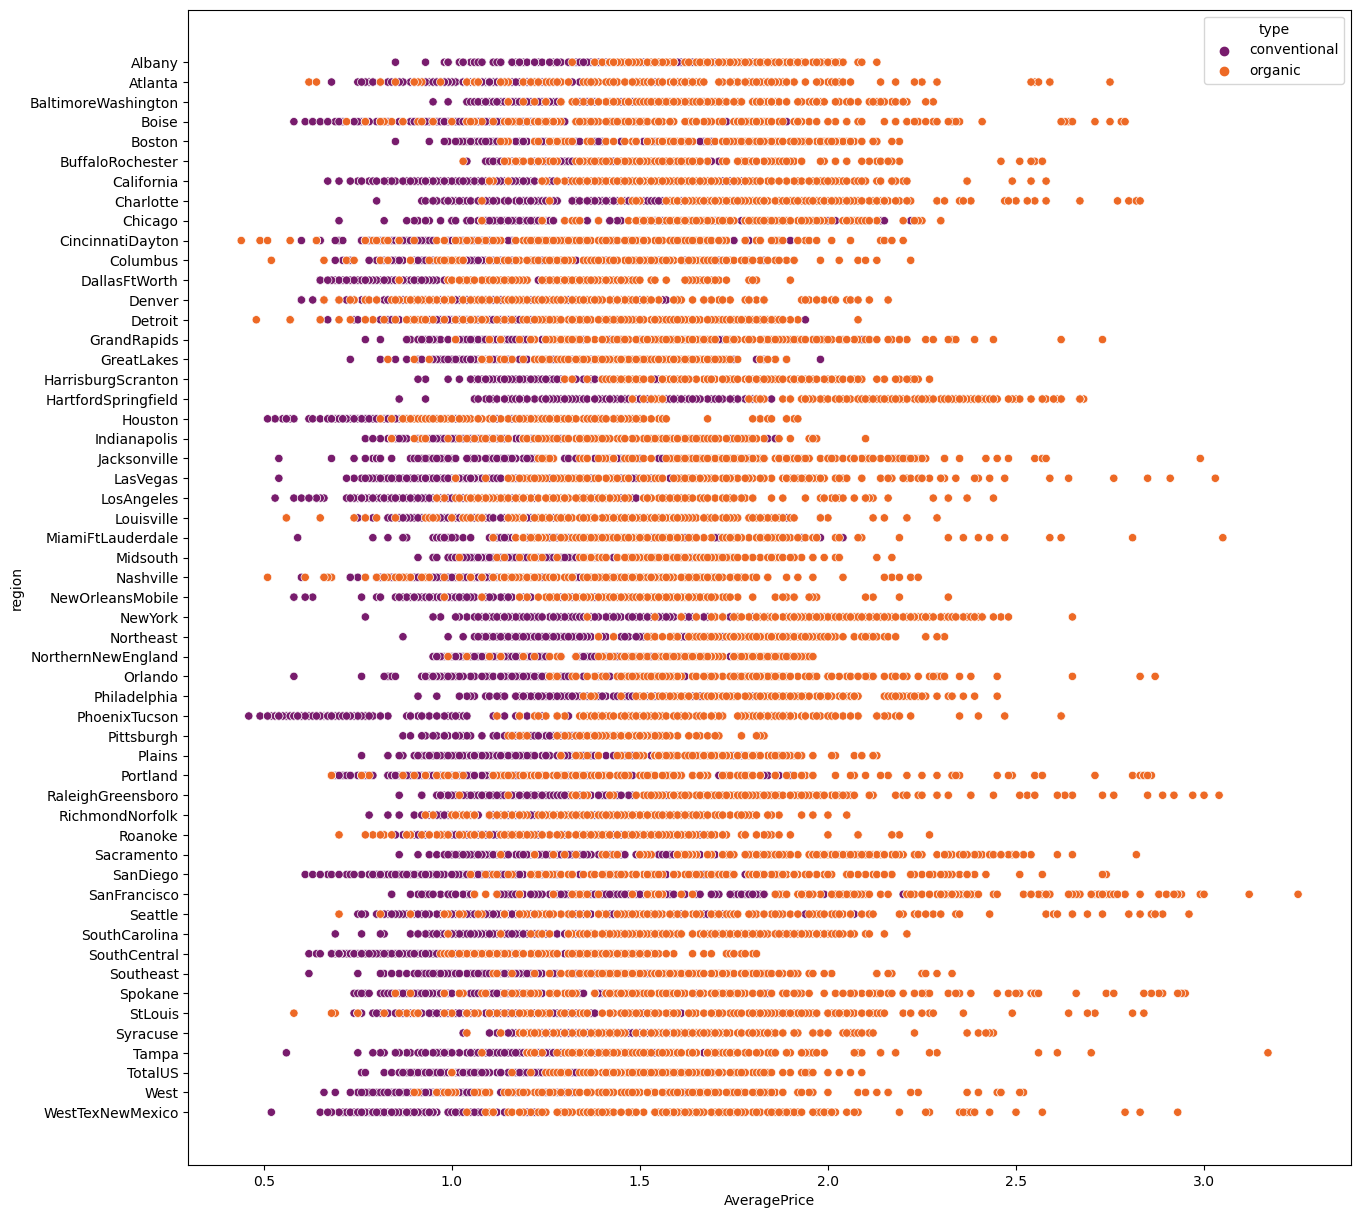

In [23]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='AveragePrice', y='region', hue='type', data=df, palette="inferno")
plt.show()

The scatterplot indicates that the average price for organic products in each region consistently surpasses that of conventional ones.

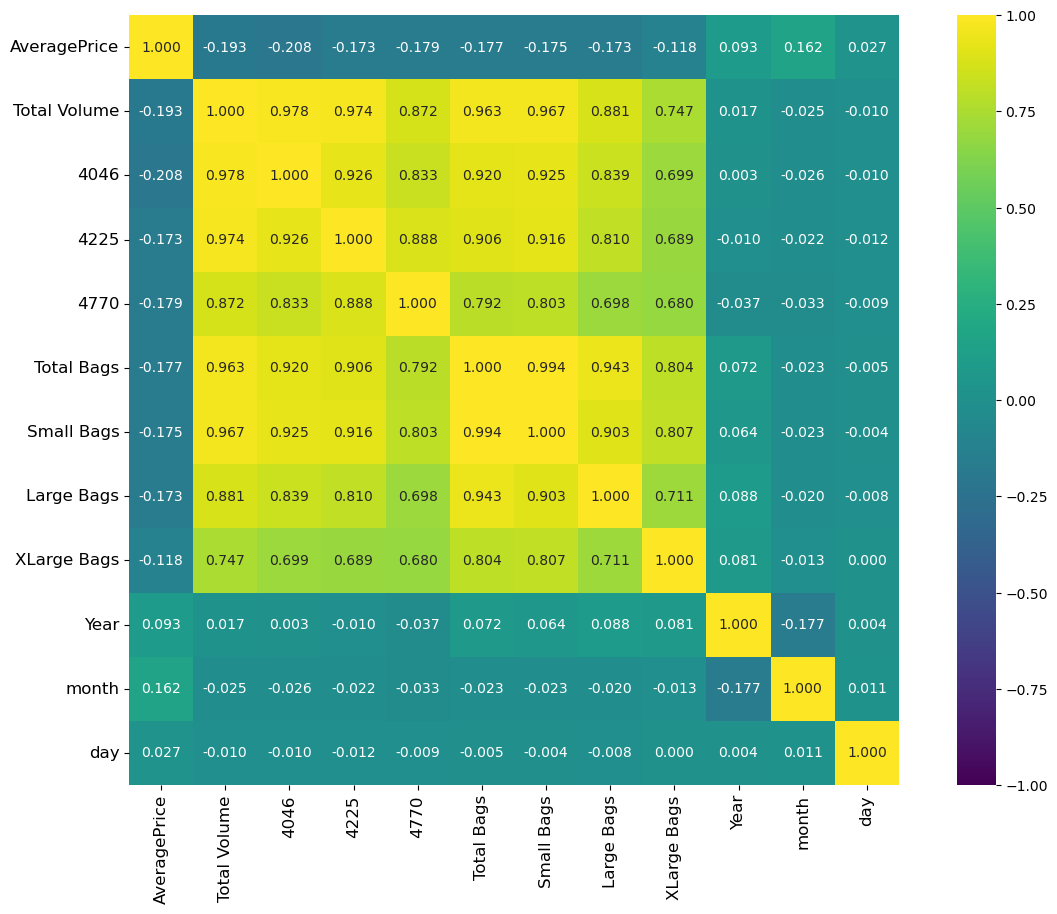

In [24]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="viridis")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The correlation heatmap of our dataset, df, reveals that several columns, such as 4046, 4225, and 4770, have a high correlation with Total Volume. To avoid multicollinearity issues, we need to drop these columns. Similarly, Small Bags, Large Bags, and Xlarge Bags are highly correlated with Total Bags and should also be removed.

In [25]:
df.drop(['4046','4225','4770','Small Bags','Large Bags','XLarge Bags'],axis=1,inplace=True)

In [26]:
df

,AveragePrice,Total Volume,Total Bags,type,region,Year,month,day
0,1.33,64236.62,8696.87,conventional,Albany,2015,12,27
1,1.35,54876.98,9505.56,conventional,Albany,2015,12,20
2,0.93,118220.22,8145.35,conventional,Albany,2015,12,13
3,1.08,78992.15,5811.16,conventional,Albany,2015,12,6
4,1.28,51039.60,6183.95,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,organic,WestTexNewMexico,2018,2,4
18245,1.71,13888.04,9264.84,organic,WestTexNewMexico,2018,1,28
18246,1.87,13766.76,9394.11,organic,WestTexNewMexico,2018,1,21
18247,1.93,16205.22,10969.54,organic,WestTexNewMexico,2018,1,14


In [27]:
oe=OrdinalEncoder()
df['type']=oe.fit_transform(df['type'].values.reshape(-1,1))
df['region']=oe.fit_transform(df['region'].values.reshape(-1,1))
df

,AveragePrice,Total Volume,Total Bags,type,region,Year,month,day
0,1.33,64236.62,8696.87,0.0,0.0,2015,12,27
1,1.35,54876.98,9505.56,0.0,0.0,2015,12,20
2,0.93,118220.22,8145.35,0.0,0.0,2015,12,13
3,1.08,78992.15,5811.16,0.0,0.0,2015,12,6
4,1.28,51039.60,6183.95,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,1.0,53.0,2018,2,4
18245,1.71,13888.04,9264.84,1.0,53.0,2018,1,28
18246,1.87,13766.76,9394.11,1.0,53.0,2018,1,21
18247,1.93,16205.22,10969.54,1.0,53.0,2018,1,14


Using the OrdinalEncoder, we've transformed certain object data into numerical data, since machine learning algorithms cannot process object type data.

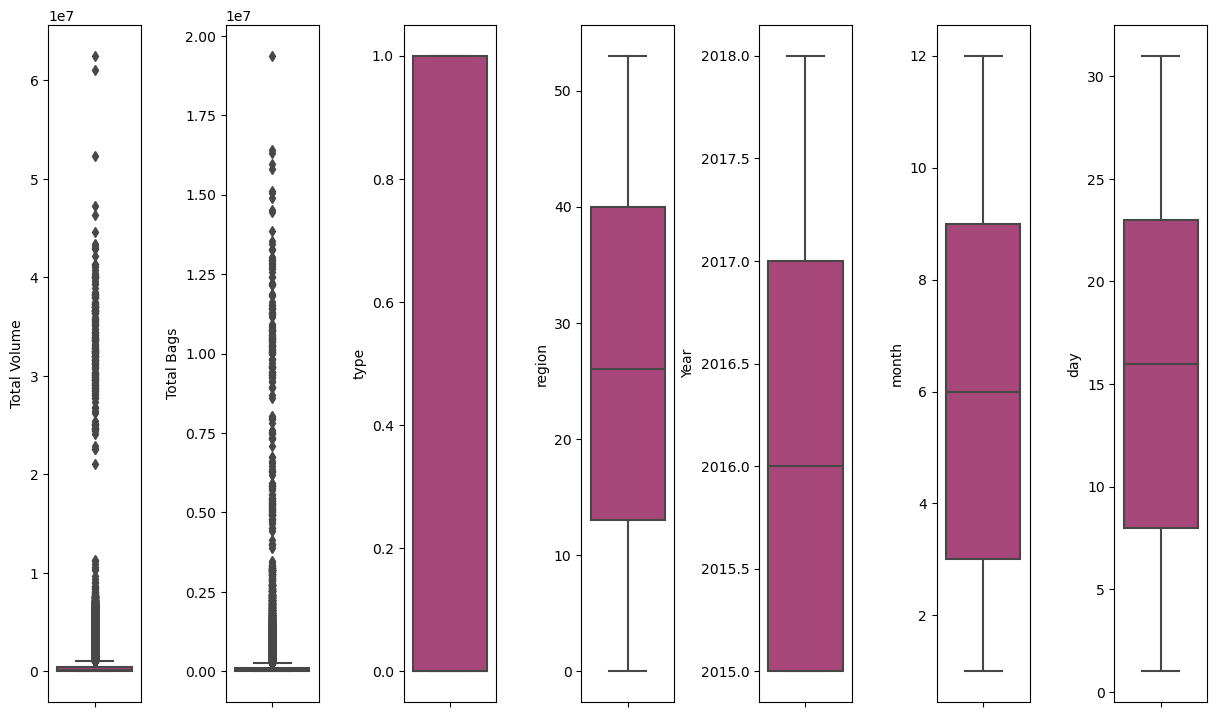

In [28]:
fig, ax = plt.subplots(ncols=7, nrows=1, figsize=(12,7))
index = 0
features = df.drop("AveragePrice", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="magma")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

In [29]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,AveragePrice,Total Volume,Total Bags,type,region,Year,month,day
0,0.188689,0.227716,0.234170,0.999836,1.700252,1.221282,1.647632,1.291857
1,0.139020,0.230427,0.233350,0.999836,1.700252,1.221282,1.647632,0.494231
2,1.182069,0.212085,0.234730,0.999836,1.700252,1.221282,1.647632,0.303396
3,0.809551,0.223444,0.237096,0.999836,1.700252,1.221282,1.647632,1.101022
4,0.312861,0.231538,0.236718,0.999836,1.700252,1.221282,1.364669,1.519750
...,...,...,...,...,...,...,...,...
18244,0.556347,0.241373,0.229301,1.000164,1.700811,1.970504,1.181997,1.328915
18245,0.755023,0.242296,0.233594,1.000164,1.700811,1.970504,1.464959,1.405803
18246,1.152375,0.242331,0.233463,1.000164,1.700811,1.970504,1.464959,0.608177
18247,1.301382,0.241625,0.231866,1.000164,1.700811,1.970504,1.464959,0.189449


In [30]:
threashold=3
print(np.where(z>3))

(array([ 2652,  2652,  2653,  2653,  2654,  2654,  2655,  2655,  2656,
        2656,  2657,  2657,  2658,  2658,  2659,  2659,  2660,  2660,
        2661,  2661,  2662,  2662,  2663,  2663,  2664,  2664,  2665,
        2665,  2666,  2666,  2667,  2667,  2668,  2668,  2669,  2669,
        2670,  2670,  2671,  2671,  2672,  2672,  2673,  2673,  2674,
        2674,  2675,  2675,  2676,  2676,  2677,  2677,  2678,  2678,
        2679,  2679,  2680,  2680,  2681,  2681,  2682,  2682,  2683,
        2683,  2684,  2684,  2685,  2685,  2686,  2686,  2687,  2687,
        2688,  2688,  2689,  2689,  2690,  2690,  2691,  2691,  2692,
        2692,  2693,  2693,  2694,  2694,  2695,  2695,  2696,  2696,
        2697,  2697,  2698,  2698,  2699,  2699,  2700,  2700,  2701,
        2701,  2702,  2702,  2703,  2703,  5460,  5460,  5461,  5461,
        5462,  5462,  5463,  5463,  5464,  5464,  5465,  5465,  5466,
        5466,  5467,  5467,  5468,  5468,  5469,  5469,  5470,  5470,
        5471,  5471

In [31]:
df_new=df[(z<3).all(axis=1)]

In [32]:
df.shape,df_new.shape,
(18249-17931)/18249*100

1.7425612362321221

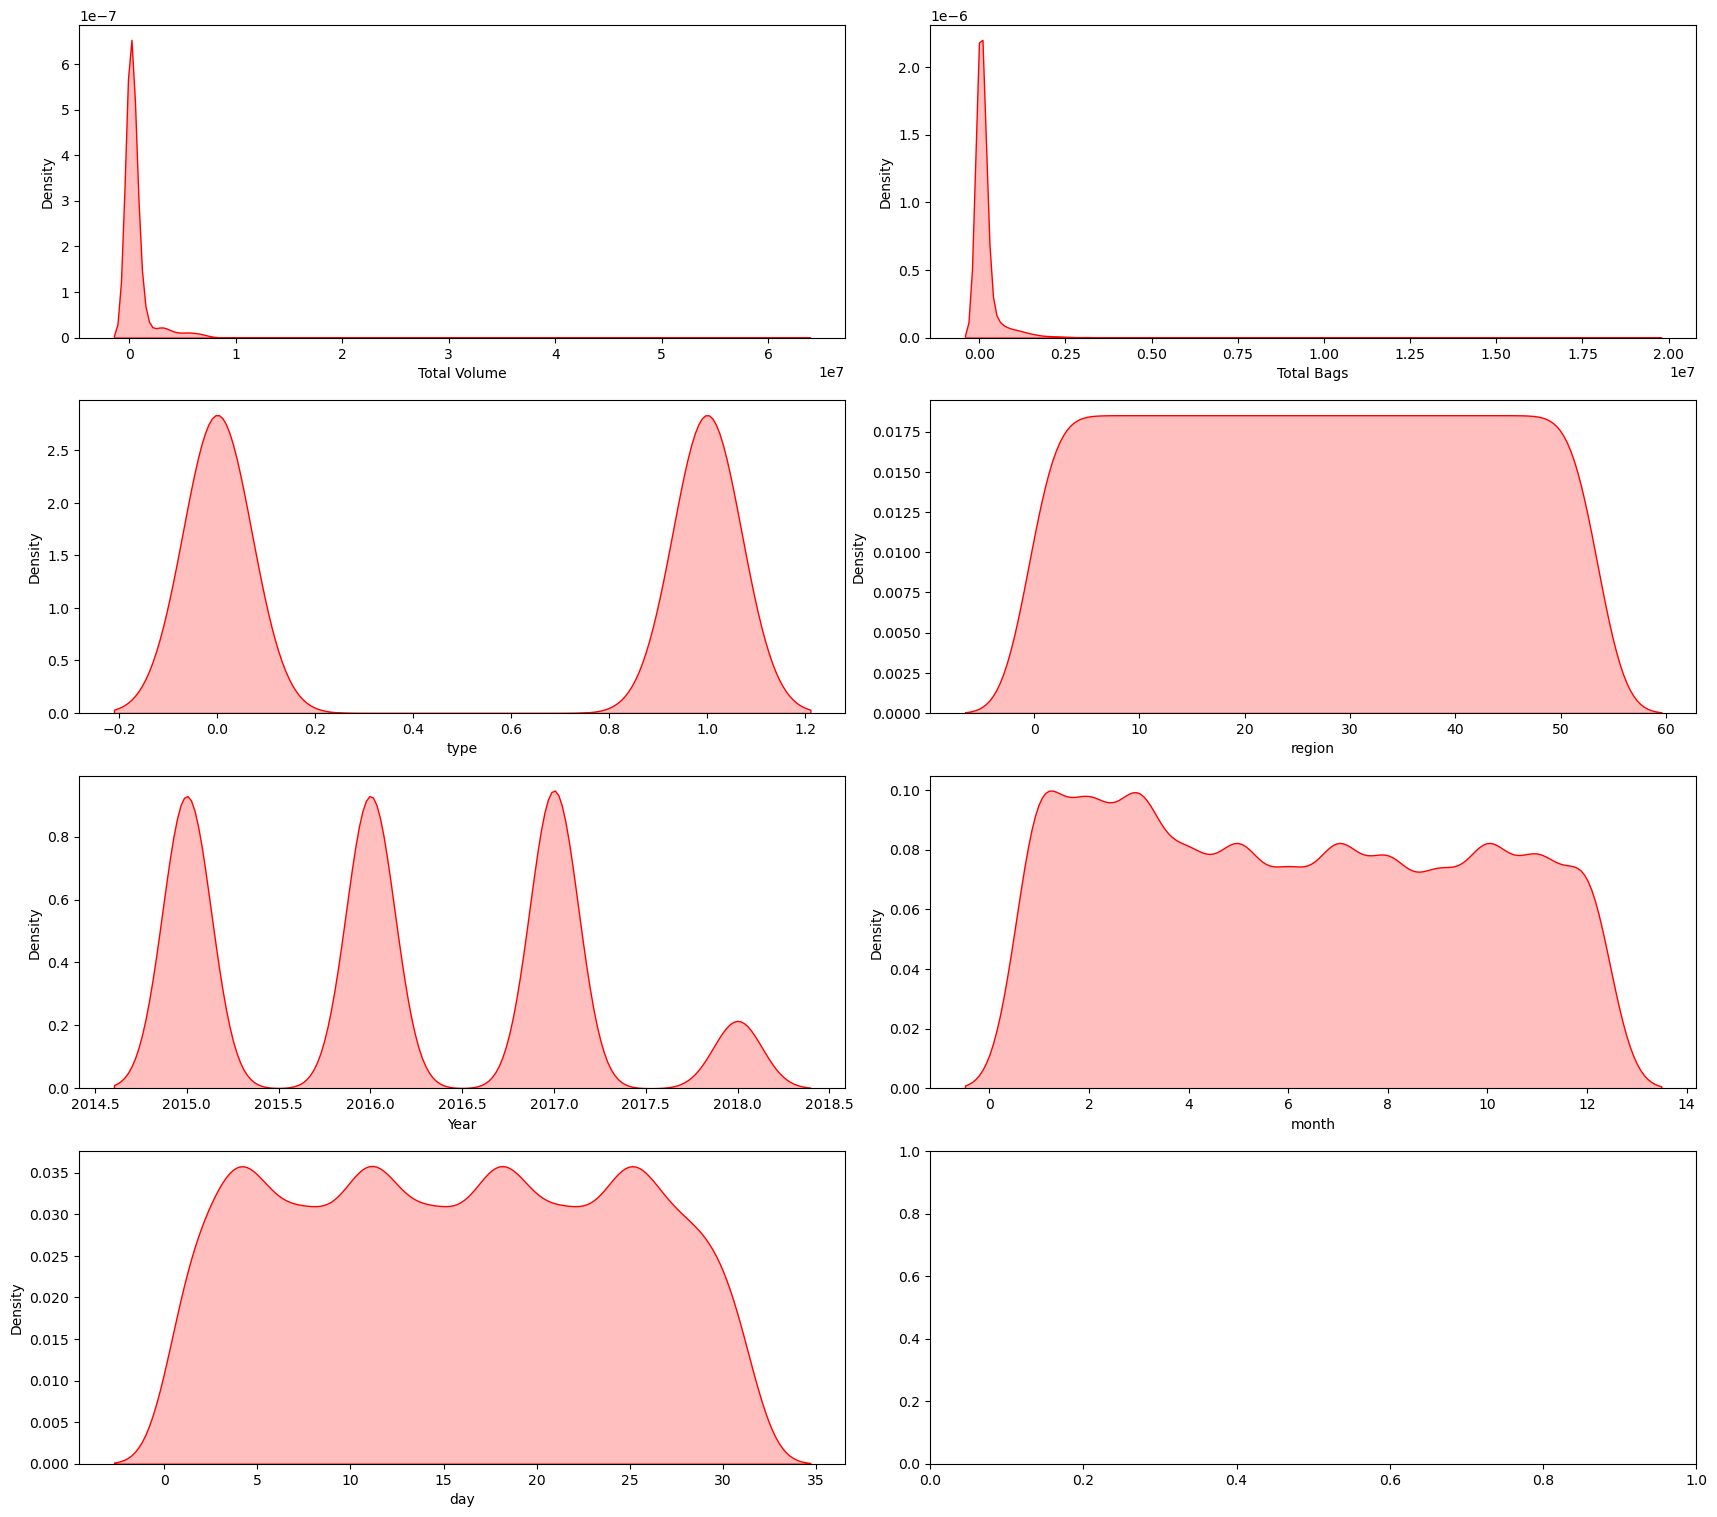

In [33]:
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(17,15))
index = 0
features = df.drop("AveragePrice", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

In [34]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [35]:
df.skew()

AveragePrice    0.138629
Total Volume    0.088098
Total Bags     -0.218874
type            0.000329
region          0.000030
Year            0.215339
month           0.106617
day             0.014310
dtype: float64

In [36]:
#Splitting Data into Two parts namely X (Features) and Y (Label)

x=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']

In [37]:
scale=StandardScaler()

In [38]:
x=pd.DataFrame(scale.fit_transform(x), columns=x.columns)

In [39]:
x

,Total Volume,Total Bags,type,region,Year,month,day
0,-0.107282,-0.494074,-0.999836,-1.700252,-1.221282,1.647632,1.291857
1,-0.175949,-0.454761,-0.999836,-1.700252,-1.221282,1.647632,0.494231
2,0.158690,-0.523041,-0.999836,-1.700252,-1.221282,1.647632,-0.303396
3,-0.017121,-0.672335,-0.999836,-1.700252,-1.221282,1.647632,-1.101022
4,-0.207558,-0.644845,-0.999836,-1.700252,-1.221282,1.364669,1.519750
...,...,...,...,...,...,...,...
18244,-0.685006,-0.299689,1.000164,1.700811,1.970504,-1.181997,-1.328915
18245,-0.775077,-0.466102,1.000164,1.700811,1.970504,-1.464959,1.405803
18246,-0.778901,-0.459975,1.000164,1.700811,1.970504,-1.464959,0.608177
18247,-0.707798,-0.391424,1.000164,1.700811,1.970504,-1.464959,-0.189449


In [40]:
#Finding best random state to build Regression Model

maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.5154450113185595 on Random State 672


In [41]:
#Train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.25,random_state=672)

In [42]:
def reg(model,x,y):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.25,random_state=672)
    
    #model fitting
    model.fit(X_train,Y_train)
    
    #predicting the model
    pred=model.predict(X_test)
    
    
    #Mean squared error
    print('mean square error',mean_squared_error(pred,Y_test))
    
    #R2_score
    r2=r2_score(pred,Y_test,multioutput="variance_weighted")*100
    print('r2_score',r2)
    
    #cv score
    cv_score=cross_val_score(model,x,y,cv=5).mean()*100
    print('cv score ',cv_score)
    #final score 
    result=r2-cv_score
    print('final score =',result)

In [43]:
model=LinearRegression()
reg(model,x,y)

mean square error 0.01347453416649099
r2_score -2.0916269978194846
cv score  14.362453555163924
final score = -16.45408055298341


In [44]:
#Random forest regressor
model=RandomForestRegressor()
reg(model,x,y)

mean square error 0.0029751430916164553
r2_score 86.85459892183354
cv score  9.865878979328823
final score = 76.98871994250472


In [45]:
#AdaBoostRegressor
model=AdaBoostRegressor()
reg(model,x,y)

mean square error 0.012335888094099445
r2_score 3.0961636527721104
cv score  6.785251781937491
final score = -3.689088129165381


In [46]:
#support vector Regressor
model=SVR()
reg(model,x,y)

mean square error 0.009186826366427649
r2_score 47.289721215740165
cv score  -20.277219104851614
final score = 67.56694032059178


In [47]:
#Dtr
model=DecisionTreeRegressor()
reg(model,x,y)

mean square error 0.005875495205247981
r2_score 78.7018909098219
cv score  -17.642160510952742
final score = 96.34405142077463


In [48]:
#Ridge
model=Ridge(alpha=1)
reg(model,x,y)

mean square error 0.013474675702694462
r2_score -2.1119659503892274
cv score  14.365774566244824
final score = -16.47774051663405


In [49]:
#Lasso
model=Lasso(alpha=1)
reg(model,x,y)

mean square error 0.027812853228557987
r2_score -2.2564467257114354e+32
cv score  -103.77105535400972
final score = -2.2564467257114354e+32


In [50]:
#XGBRegressor
model=XGBRegressor()
reg(model,x,y)

mean square error 0.002715167855261281
r2_score 88.53691830582878
cv score  43.44985609350638
final score = 45.0870622123224


In [51]:
# Hyper parameter tuning for best ML model

#XGBRegressor
fmod_param={'n_estimators' : [200, 400, 600],
              'gamma' : [2.0, 3.0, 4.0],
              'max_depth' : [4, 6, 8],
              'n_jobs' : [-2, -1, 1]
             }

In [52]:
GSCV=GridSearchCV(XGBRegressor(),fmod_param,cv=5)

In [60]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'gamma': [2.0, 3.0, 4.0], 'max_depth': [4, 6, 8],
                         'n_estimators': [200, 400, 600],
                         'n_jobs': [-2, -1, 1]})

In [61]:
GSCV.best_score_


0.5780035823390738

In [62]:
GSCV.best_params_

{'gamma': 2.0, 'max_depth': 6, 'n_estimators': 200, 'n_jobs': -2}

In [63]:
Final_Model = XGBRegressor(gamma=2.0, max_depth=8, n_estimators=200, n_jobs=-2)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 64.3928301016917


In [64]:
#Saving our model

filename='avacado.project'
pickle.dump(Final_Model,open(filename,'wb'))